# Necessary Imports and Connecting Google Drive

In [1]:
from google.colab import drive
drive.mount("/content/gdrive/")

import pandas as pd
import numpy as np
import csv
import nltk
from sklearn import svm
from sklearn import naive_bayes
from sklearn import metrics
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from collections import defaultdict
from sklearn import model_selection, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import string
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

Mounted at /content/gdrive/


# Reading the Data

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# data = pd.read_csv('train-balanced-sarcasm.csv', on_bad_lines="skip", engine="python", nrows = 100000)

# Read the labels and the data
dataset_dir = '/content/gdrive/MyDrive/CS464/'
dataset_path = os.path.join(dataset_dir, 'train-balanced-sarcasm.csv')
labels = pd.read_csv(dataset_path, dtype=int, usecols= ['label'], nrows = 100000)  
sarcasm_data = pd.read_csv(dataset_path, dtype= str, usecols = ['comment'], nrows = 100000)

sarcasm_data = pd.DataFrame(sarcasm_data)
sarcasm_data['comment'].dropna(inplace=True)
sarcasm_data['comment'] = sarcasm_data['comment'].astype(str)

# make all comments lowercase
sarcasm_data['comment'] = sarcasm_data['comment'].str.lower()

# remove punctuations
def remove_punctuations(text):
    for char in string.punctuation:
        text = text.replace(char, '')
    return text
sarcasm_data['comment'] = sarcasm_data['comment'].apply(remove_punctuations)
# tokenization
sarcasm_data['comment'] = sarcasm_data['comment'].apply(word_tokenize)

# tag adjectives, verbs and adverbs for lemmatization
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ 
tag_map['V'] = wn.VERB 
tag_map['R'] = wn.ADV 

for i in range(sarcasm_data.shape[0]):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(sarcasm_data['comment'].iloc[i]):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    sarcasm_data.loc[i,'comment'] = str(Final_words)
    
print("Finished preprocessing")
print(sarcasm_data)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Finished preprocessing
                                                 comment
0                                           ['nc', 'nh']
1      ['know', 'west', 'team', 'play', 'west', 'team...
2      ['underdog', 'earlier', 'today', 'since', 'gro...
3      ['meme', 'isnt', 'funny', 'none', 'new', 'york...
4                        ['could', 'use', 'one', 'tool']
...                                                  ...
99995                                        ['jealous']
99996  ['yeah', 'know', 'baby', 'boomer', 'cause', 'w...
99997                       ['story', 'set', 'artstyle']
99998  ['ebola', 'virus', 'papyrus', 'german', 'iris'...
99999                                   ['ford', 'good']

[100000 rows x 1 columns]


In [3]:
# Split the data into validation, test, training
Train_X, Data_X, Train_Y, Data_Y = model_selection.train_test_split(sarcasm_data['comment'], labels['label'], test_size=0.3)
Test_X, Val_X, Test_Y, Val_Y = model_selection.train_test_split(Data_X,Data_Y,test_size=1/3)
# Encode the labels 
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)
# Vectorize the text data
Tfidf_vect = TfidfVectorizer(max_features=10000)
Tfidf_vect.fit(sarcasm_data['comment'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)
print(Tfidf_vect.vocabulary_)

{'nc': 5823, 'nh': 5909, 'know': 4821, 'west': 9698, 'team': 8762, 'play': 6634, 'east': 2674, 'right': 7475, 'underdog': 9255, 'earlier': 2663, 'today': 8972, 'since': 8066, 'announcement': 333, 'afternoon': 145, 'vega': 9436, 'line': 5037, 'move': 5699, 'meme': 5397, 'isnt': 4568, 'funny': 3473, 'none': 5966, 'new': 5895, 'york': 9951, 'nigga': 5923, 'one': 6163, 'could': 1867, 'use': 9371, 'tool': 8998, 'dont': 2513, 'pay': 6435, 'attention': 535, 'long': 5100, 'shes': 7944, 'legal': 4939, 'wouldnt': 9861, 'kick': 4774, 'bed': 740, 'take': 8715, 'load': 5071, 'trick': 9116, 'general': 3552, 'weird': 9686, 'blade': 859, 'gtfo': 3769, 'good': 3670, 'build': 1104, 'buy': 1160, 'game': 3501, 'save': 7714, 'would': 9859, 'love': 5124, 'see': 7817, 'think': 8878, 'significant': 8037, 'amount': 280, 'spend': 8316, 'tax': 8745, 'dollar': 2491, 'people': 6480, 'damn': 2068, 'hop': 4088, 'god': 3649, 'real': 7162, 'agenda': 150, 'great': 3731, 'idea': 4202, 'ayy': 600, 'bb': 714, 'make': 5208

SVM Accuracy Score ->  67.105
Confusion Matrix for SVM:


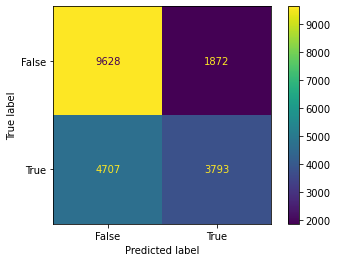

In [8]:
# SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Find the accuracy score
print("SVM Accuracy Score -> ", accuracy_score(predictions_SVM, Test_Y)*100)
print("Confusion Matrix for SVM:")
conf_matrix=confusion_matrix(Test_Y, predictions_SVM, labels=[0,1])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

RFC Accuracy Score -> 66.675
Confusion Matrix for RFC:


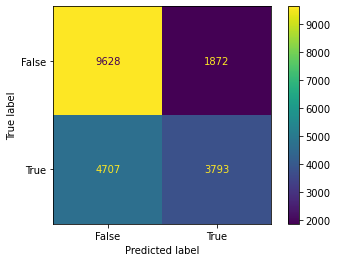

In [7]:
# Random Forest
RFC = RandomForestClassifier()
# fit the training dataset on the classifier
RFC.fit(Train_X_Tfidf, Train_Y)
# predict the labels on validation set
predictions_RFC = RFC.predict(Test_X_Tfidf)
# Calc. accuracy
print("RFC Accuracy Score ->", accuracy_score(predictions_RFC, Test_Y)*100)
print("Confusion Matrix for RFC:")
conf_matrix= confusion_matrix(Test_Y, predictions_SVM, labels=[0,1])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()


NAIVE BAYES Accuracy Score -> 66.29
Confusion Matrix for RFC:


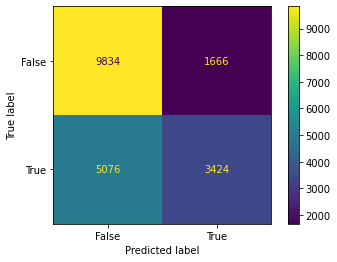

In [6]:
#Naive Bayes 
NAIVE_BAYES = naive_bayes.MultinomialNB()
# fit the training dataset on the classifier
NAIVE_BAYES.fit(Train_X_Tfidf, Train_Y)
# predict the labels on validation set
predictions_NAIVE_BAYES = NAIVE_BAYES.predict(Test_X_Tfidf)
# Calc. accuracy
print("NAIVE BAYES Accuracy Score ->", accuracy_score(predictions_NAIVE_BAYES, Test_Y)*100)
print("Confusion Matrix for RFC:")
conf_matrix=confusion_matrix(Test_Y, predictions_NAIVE_BAYES, labels=[0,1])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

